# Project Assignment #2
## Leonardo Paiva


**Data Source:**

The source that I will be using is from (Kaggle) with usability score of 9.41.

The Author is Aadhav Vighnesh and it was pulbished 2 year ago.

The title of the dataset is *Calories Burned During Exercise and Activities*

[Official source](https://www.kaggle.com/datasets/aadhavvignesh/calories-burned-during-exercise-and-activities?select=exercise_dataset.csv)

[Download dataset directly from my github](https://github.com/leozitopaiva/csx4501/blob/main/exercise_dataset.csv)


**Description:**

This dataset contains the number of calories burned by a person while performing some activity/exercise. It currently contains 248 activities and exercises ranging from running, cycling, calisthenics, etc.

**About this file:**

This dataset includes 6 columns:

Activity, Exercise or Sport (1 hour)

* 130 lb

* 155 lb

* 180 lb

* 205 lb

* Calories per lb

## Choose a question about the data that you can use machine learning to explore

Before state my questions, I would like to give same contect about the dataset I am using:

This dataset contains the number of calories burned by a person while performing some activity/exercise.
It currently contains 248 activities and exercises ranging from running, cycling, calisthenics, etc.

The data was collected from five different person with different weights (130lb, 155lb, 180, and 205lb) 

- I want to use machine learn to answer the follwing questions:
    - Q1. Within each persona group (130lb, 155lb, 180, and 205lb) I would like to idendify what is the avarage of calory burned from each person comparing then 248 activities.
    - Q2. I want to know if the cycling activities are above/below the avarage of all activities
    - Q3. inside of this dataset there are categories of activities like "light". "moderate", and "vigorous". I want to know what is the different between them in regards to calories burned

In [95]:
# Importing the necessary Libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [57]:
# Importing the data from the Dataset "exercise_dataset.csv" and printing it to check if the import process worked.
impdata = pd.read_csv('exercise_dataset.csv')
impdata

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


# Q1. Within each persona group (130lb, 155lb, 180, and 205lb) I would like to idendify what is the avarage of calory burned from each person comparing then 248 activities.

- In order to validate this questions I am going to calculate the avarge of calory burned across all 248 activities inside of each persona group

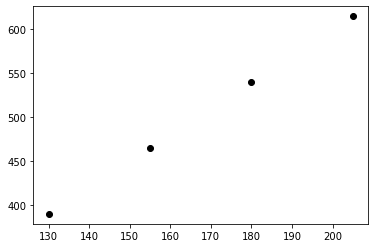

In [58]:
x = [130, 155, 180, 205]
y = [impdata['130 lb'].mean(), impdata['155 lb'].mean(), impdata['180 lb'].mean(), impdata['205 lb'].mean()]
plt.plot(x,y,'ko')


- As we can see on the above plot - It sounds like there is a correlaction between each persona group.

# Q2. I want to know if the cycling activities are above/below the avarage of all activities

- Now I am going to filter/break the initial dataset into small df, so I can play with different sport activities.

In [59]:
cyclingdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('Cycling')]

In [60]:
cyclingdf

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
5,"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.059443
6,"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.471061


- Here it is possible to identify that there is different intensity inside cycling. For now I will keep my inital question, but late I will explorer those different intensities as well.

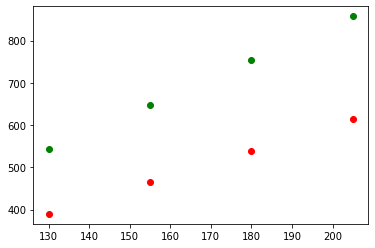

In [61]:
x = [130, 155, 180, 205]
y1 = [impdata['130 lb'].mean(), impdata['155 lb'].mean(), impdata['180 lb'].mean(), impdata['205 lb'].mean()]
y2 = [cyclingdf['130 lb'].mean(), cyclingdf['155 lb'].mean(), cyclingdf['180 lb'].mean(), cyclingdf['205 lb'].mean()]
plt.plot(x,y1,'ro')
plt.plot(x,y2,'go')

- According to the plot we can see that Cylcing (y2 = in green) is above the avarage of all the avarage of all activities.

# Q3. inside of this dataset there are categories of activities like "light". "moderate", and "vigorous". I want to know what is the different between them in regards to calories burned

here I am going to filter/break the dataset into 3 new df (lightdf, moderatedf, vigorousdf) and I will plot the output to validate the information.

In [62]:
lightdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('light')]
moderatedf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('moderate')]
vigorousdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('vigorous')]


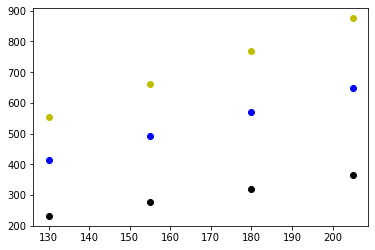

In [63]:
x = [130, 155, 180, 205]
y3 = [lightdf['130 lb'].mean(), lightdf['155 lb'].mean(), lightdf['180 lb'].mean(), lightdf['205 lb'].mean()]
y4 = [moderatedf['130 lb'].mean(), moderatedf['155 lb'].mean(), moderatedf['180 lb'].mean(), moderatedf['205 lb'].mean()]
y5 = [vigorousdf['130 lb'].mean(), vigorousdf['155 lb'].mean(), vigorousdf['180 lb'].mean(), vigorousdf['205 lb'].mean()]

plt.plot(x,y3,'ko')
plt.plot(x,y4,'bo')
plt.plot(x,y5,'yo')

- According to the plot we were able to identy the different. We can see that the gap between light to modarate is bigger than moderate to vigorous.

    - lightdf (Black)
    - moderatedf (Blue)
    - vigorousdf (Yellow)

In [64]:
# We already saw on the plot that there was correlation, but lets double check with Numpy
cl = np.corrcoef(x, y)
print (cl)

cl1 = np.corrcoef(x, y1)
print (cl1)

cl2 = np.corrcoef(x, y2)
print (cl2)

cl3 = np.corrcoef(x, y3)
print (cl3)

cl4 = np.corrcoef(x, y4)
print (cl4)

cl5 = np.corrcoef(x, y5)
print (cl5)


[[1.         0.99999999]
 [0.99999999 1.        ]]
[[1.         0.99999999]
 [0.99999999 1.        ]]
[[1.         0.99999972]
 [0.99999972 1.        ]]
[[1.         0.99999925]
 [0.99999925 1.        ]]
[[1.        0.9999996]
 [0.9999996 1.       ]]
[[1.         0.99999995]
 [0.99999995 1.        ]]


# Perform machine learning with your data

- In order to apply Machine learning, I am going to use regression as ML methodology


In [87]:
np_array = np.asarray(x)
x_transformed = np_array.reshape((-1, 1))

In [109]:
# Choose the model

model1 = sklearn.linear_model.LinearRegression()

#Splliting the data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x_transformed, y, test_size=0.2, random_state=42)

# Trainign the model
model1.fit(x_train, y_train)

LinearRegression()

In [110]:
# Princting the Coeficiente
model1.coef_

array([2.99828341])

In [111]:
y_pred1 = model1.predict(x_test)

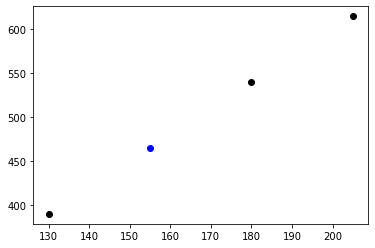

In [112]:
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')
plt.show()